# Revisão dos currículos.

## Changelog

versionadded
: 24.07

    - first version revision (20)


versionchanged
: 24.07

    - pie chart for majority areas (20)
    - Final report (21)

>   **Open Source Notification:** This file is part of open source program **INEP**
>   > **Copyright © 2023  Carlo Oliveira** [carlo @ nce](mailto:carlo@nce.ufrj.br),
> 
>   **SPDX-License-Identifier:** [GNU General Public License v3.0 or later] (https://is.gd/3Udt).
>   > Labase (http://labase.selfip.org/) - NCE (https://portal.nce.ufrj.br) - UFRJ (https://ufrj.br/).

> codeauthor:: [Carlo Oliveira](mailto:carlo@nce.ufrj.br)

## Carrega do arquivo editado CSV

In [2]:
from ipnb.util import vetorize, tokenize_into_words, euclid
import os
from pathlib import Path
import pandas as pd
here = os.path.abspath('')
dados = Path(here).parent.parent / "src" / "data" / 'relatorio0.csv'
df = pd.read_csv(dados, dtype=dict(rotulo=str))
dados = Path(here).parent.parent / "src" / "data" / 'relatorio1.csv'
dt = pd.read_csv(dados, dtype=dict(rotulo=str))
df['tokens'] = df["nome_disciplina"].apply(tokenize_into_words)
df['vector'] = df["tokens"].apply(vetorize)
df['ch'] = dt["ch"]
df['rotulo'] = df["rotulo"].astype(str)
df["chw"] = df.apply(lambda row: row["ch"] * row.dentro, axis=1)
dd = df.groupby(['rotulo'])["chw"].sum().reset_index()
df

/home/carlo/Documentos/dev/spike/src/ipnb/util.py:64: RuntimeWarning: Mean of empty slice.
  return np.array([GLOVER[w] for w in _words]).mean(axis=0)


,curso_id,dentro,nome_disciplina,horas,rotulo,nomeado,tokens,vector,ch,chw
0,1666036,0,Projeto Integrador - Elementos e Conceitos de ...,70,0612D01,defesa cibernética,"[projeto, integrador, elementos, conceitos, ci...","[-0.05084260000000003, 0.20778920000000003, 0....",2.138057,0.000000
1,1666036,0,Sistemas Computacionais para CiberSegurança,63,0612D01,defesa cibernética,"[sistemas, computacionais, cibersegurança]","[0.098875, 0.17971766666666666, 0.112613666666...",1.924252,0.000000
2,1666036,1,Estudo do Espaço Cibernético,63,0612D01,defesa cibernética,"[estudo, espaço, cibernético]","[0.18051766666666666, -0.181362, 0.05125366666...",1.924252,1.924252
3,1666036,1,Lógica Matemática,63,0612D01,defesa cibernética,"[lógica, matemática]","[0.064137, 0.145569, -0.057595499999999994, 0....",1.924252,1.924252
4,1666036,1,Teologia e Fenômeno Humano,32,0612D01,defesa cibernética,"[teologia, fenômeno, humano]","[0.10753833333333333, -0.08160933333333333, 0....",0.977398,0.977398
...,...,...,...,...,...,...,...,...,...,...
724,1549921,0,Usabilidade e Fatores Humanos em Cibersegurança,80,0615S01,segurança da informação,"[usabilidade, fatores, humanos, cibersegurança]","[0.210529, 0.24265525, -0.049493749999999996, ...",2.020202,0.000000
725,1549921,1,Governança de Cibersegurança,80,0615S01,segurança da informação,"[governança, cibersegurança]","[0.152522, 0.19354749999999998, -0.1372115, 0....",2.020202,2.020202
726,1549921,0,Blockchain,80,0615S01,segurança da informação,[blockchain],"[0.075335, -0.003288, 0.017649, 0.173275, 0.03...",2.020202,0.000000
727,1549921,1,Empreendedorismo e Inovação em TI,40,0615S01,segurança da informação,"[empreendedorismo, inovação, ti]","[0.232263, -0.22350466666666668, -0.0052239999...",1.010101,1.010101


## Calcula os vetores linguísticos dos rótulos 

In [3]:
dv = df.groupby(['rotulo'])["vector"].mean()
dv

rotulo
0612D01    [0.08212626658258101, 0.14919778840945308, 0.0...
0612G01    [0.11604870310734465, 0.09433873644067801, 0.0...
0613E01    [0.0712639909733124, 0.05999575782312926, 0.07...
0615S01    [0.08014285920542637, 0.15576943071705426, 0.0...
0615S02    [0.10645183789198606, 0.1499687845818815, 0.05...
0615S03    [0.11720448863826236, 0.09879519181286549, 0.0...
0616I01    [0.15059945432098765, 0.1414789487654321, -0.0...
Name: vector, dtype: object

## Dicionário de vetores por sub área

In [4]:
dr =df["curso_id rotulo vector chw".split()].copy()
dr.drop(dr[dr['chw'] < 0.9].index, inplace=True)
sub = dr.groupby(['rotulo'])["vector"].mean().to_dict()
sub = {k.replace("6130", "0613E01"): v for k, v in sub.items()}
list(sub.keys())

['0612D01', '0612G01', '0613E01', '0615S01', '0615S02', '0615S03', '0616I01']

## Calcula as distancias das disciplina para a sub área

In [5]:
for rotulo, vetor in sub.items():
    dr[rotulo] = dr.apply(lambda row: euclid(row.vector, vetor), axis=1)
    
dr.dropna(subset=['vector'], inplace=True)
dr

,curso_id,rotulo,vector,chw,0612D01,0612G01,0613E01,0615S01,0615S02,0615S03,0616I01
2,1666036,0612D01,"[0.18051766666666666, -0.181362, 0.05125366666...",1.924252,1.072226,0.932230,0.954638,1.123523,1.029296,0.986295,1.111973
3,1666036,0612D01,"[0.064137, 0.145569, -0.057595499999999994, 0....",1.924252,1.114166,1.273542,1.298215,1.054213,1.127680,1.171689,0.967610
4,1666036,0612D01,"[0.10753833333333333, -0.08160933333333333, 0....",0.977398,1.193688,1.178301,1.203891,1.202933,1.213152,1.195384,1.179463
7,1666036,0612D01,"[-0.041893, 0.042076499999999996, -0.129196, 0...",0.977398,1.020512,1.230722,1.118068,1.015332,1.116354,1.062518,1.060615
9,1666036,0612D01,"[0.035172666666666665, 0.277406, 0.07526000000...",2.901649,0.872412,0.853335,0.839986,0.916762,0.802685,0.817861,0.971424
...,...,...,...,...,...,...,...,...,...,...,...
716,1549921,0615S01,"[-0.077913, -0.11063333333333332, 0.0588823333...",2.020202,1.201272,1.008015,1.058834,1.190036,1.121332,1.131717,1.291808
722,1549921,0615S01,"[0.21563433333333334, -0.07766233333333333, 0....",1.010101,0.954362,1.044079,1.078277,0.931662,0.988669,0.969669,0.965499
725,1549921,0615S01,"[0.152522, 0.19354749999999998, -0.1372115, 0....",2.020202,0.963789,1.170489,1.204090,0.931733,1.021632,1.052281,0.913465
727,1549921,0615S01,"[0.232263, -0.22350466666666668, -0.0052239999...",1.010101,0.989047,0.992468,1.056529,0.957883,0.995765,0.949538,0.897154


## Determina a área mais próxima por disciplina

In [6]:
cols = ['0612D01', '0613E01', '0615S03', '0612G01', '0615S02', '0615S01', '0616I01']
def rotulo(rotular):
    return cols[rotular.index(min(rotular))]
dr["tag"] = dr.apply(lambda row: rotulo([row.get(c) for c in cols]), axis=1)
dr

,curso_id,rotulo,vector,chw,0612D01,0612G01,0613E01,0615S01,0615S02,0615S03,0616I01,tag
2,1666036,0612D01,"[0.18051766666666666, -0.181362, 0.05125366666...",1.924252,1.072226,0.932230,0.954638,1.123523,1.029296,0.986295,1.111973,0612G01
3,1666036,0612D01,"[0.064137, 0.145569, -0.057595499999999994, 0....",1.924252,1.114166,1.273542,1.298215,1.054213,1.127680,1.171689,0.967610,0616I01
4,1666036,0612D01,"[0.10753833333333333, -0.08160933333333333, 0....",0.977398,1.193688,1.178301,1.203891,1.202933,1.213152,1.195384,1.179463,0612G01
7,1666036,0612D01,"[-0.041893, 0.042076499999999996, -0.129196, 0...",0.977398,1.020512,1.230722,1.118068,1.015332,1.116354,1.062518,1.060615,0615S01
9,1666036,0612D01,"[0.035172666666666665, 0.277406, 0.07526000000...",2.901649,0.872412,0.853335,0.839986,0.916762,0.802685,0.817861,0.971424,0615S02
...,...,...,...,...,...,...,...,...,...,...,...,...
716,1549921,0615S01,"[-0.077913, -0.11063333333333332, 0.0588823333...",2.020202,1.201272,1.008015,1.058834,1.190036,1.121332,1.131717,1.291808,0612G01
722,1549921,0615S01,"[0.21563433333333334, -0.07766233333333333, 0....",1.010101,0.954362,1.044079,1.078277,0.931662,0.988669,0.969669,0.965499,0615S01
725,1549921,0615S01,"[0.152522, 0.19354749999999998, -0.1372115, 0....",2.020202,0.963789,1.170489,1.204090,0.931733,1.021632,1.052281,0.913465,0616I01
727,1549921,0615S01,"[0.232263, -0.22350466666666668, -0.0052239999...",1.010101,0.989047,0.992468,1.056529,0.957883,0.995765,0.949538,0.897154,0616I01


## Calcula a carga horária proporcional

In [7]:
ds = dr.groupby(['curso_id', 'rotulo', 'tag'])["chw"].sum().reset_index()
ds["rotulo"] = ds["rotulo"].apply(lambda x: x.replace("6130", "0613E01"))
ds

,curso_id,rotulo,tag,chw
0,153693,0612G01,0612D01,6.521739
1,153693,0612G01,0612G01,28.260870
2,153693,0612G01,0613E01,3.260870
3,153693,0612G01,0615S01,6.521739
4,153693,0612G01,0615S02,3.260870
...,...,...,...,...
138,1671887,0612D01,0612G01,8.648649
139,1671887,0612D01,0613E01,6.486486
140,1671887,0612D01,0615S01,19.459459
141,1671887,0612D01,0615S02,10.810811


### Gráficos em pizza dos cálculos das áreas das disciplinas

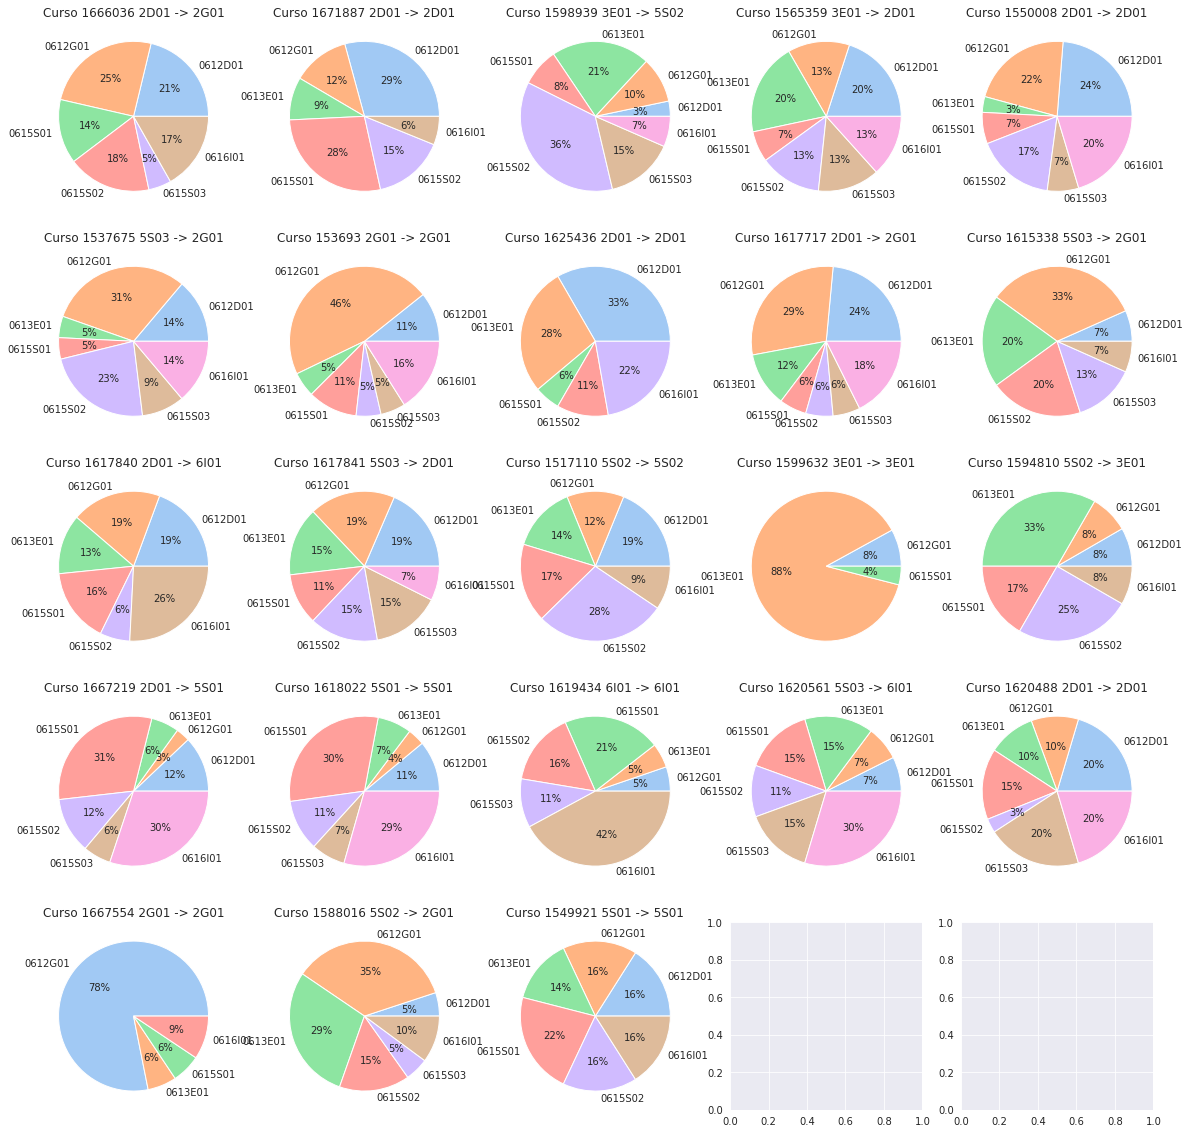

In [8]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(5, 5, figsize=(20,20))
dp = ds[["curso_id", "chw"]].copy()
import seaborn as sns
colors = sns.color_palette('pastel')[0:7]
oid = df['curso_id'].drop_duplicates().to_list()
def plot(data, i):
    chw = ds[ds['curso_id'] == data]["chw"]  # carga horária da disciplina ponderada
    chn = ds[ds['curso_id'] == data]["rotulo"].to_list()[0][-4:]  # rótulo original atribuído
    chl = chw.to_list()  # lista com a carga horária da disciplina ponderada
    chi = chl.index(max(chl))  # índice da nova sub área indicada por ser majoritária
    ch_tag = ds[ds['curso_id'] == data].iloc[chi]["tag"][-4:]  # rótulo da nova sub área indicada por ser majoritária
    axs[i //5, i % 5].pie(chw, labels=ds[ds['curso_id'] == data]["tag"].to_list(), colors = colors, autopct='%.0f%%')
    axs[i //5, i % 5].set_title(f'Curso {data} {chn} -> {ch_tag}')  # título com id do curso, área original e indicada
# create pie chart
[plot(data, i) for i, data in enumerate(oid)]
plt.show()


## Cálculo da carga horária percentual

In [21]:
di = df["nome_disciplina horas ch curso_id".split()].copy()
di['area'] = ds["tag"].astype(str)
da = di["nome_disciplina horas area ch curso_id".split()].copy()
renames = {k: v for k, v in zip("nome_disciplina horas area ch curso_id".split(), "Disciplina,Carga horária,Área detalhada,Porcentagem da carga,Identificador curso".split(","))}
da = da.rename(renames, axis=1)
import csv
sai = Path(here).parent.parent / "src" / "data" / 'relatorio_apoio.csv'
da.to_csv(sai, encoding='utf-8', index=False, quoting=csv.QUOTE_NONNUMERIC, quotechar='"')

da

,Disciplina,Carga horária,Área detalhada,Porcentagem da carga,Identificador curso
0,Projeto Integrador - Elementos e Conceitos de ...,70,0612D01,2.138057,1666036
1,Sistemas Computacionais para CiberSegurança,63,0612G01,1.924252,1666036
2,Estudo do Espaço Cibernético,63,0613E01,1.924252,1666036
3,Lógica Matemática,63,0615S01,1.924252,1666036
4,Teologia e Fenômeno Humano,32,0615S02,0.977398,1666036
...,...,...,...,...,...
724,Usabilidade e Fatores Humanos em Cibersegurança,80,NaN,2.020202,1549921
725,Governança de Cibersegurança,80,NaN,2.020202,1549921
726,Blockchain,80,NaN,2.020202,1549921
727,Empreendedorismo e Inovação em TI,40,NaN,1.010101,1549921


In [94]:
import math
import locale
cs_id = ['1594810', '1537693', '153693', '1549921', '1618022', '1550008', '1617840', '1620488', '1625436', '1517110', '1598939', '1565359', '1619434', '1615338', '1599632']
cs_id = [int(nc) for nc in cs_id]
print(cs_id)
locale.setlocale(locale.LC_NUMERIC, '')
di = ds["curso_id tag chw".split()].copy()
ll = set(di["curso_id"].to_list())
ll = set(cs_id).intersection(ll)
print(ll)
print(set(cs_id).difference(ll))
print(set(di["curso_id"].to_list()))
# dh = dh["curso_id"].astype(int)
# dh.drop(dh[dh['curso_id'] not in cs_id].index, inplace=True)

# di = di.apply(lambda row: row[~df['curso_id'].isin(cs_id)])
# dh = dh[df.curso_id.isin(cs_id)]
# di["chw"] = di["chw"].apply(lambda value: f"{int(value)},{str(value - int(value))[2:]}")
di["chw"] = di["chw"].apply(lambda value: math.trunc(value*100)/100)

dh = di.set_index(['curso_id','tag'])['chw'].unstack(fill_value=0)
# dh["Identificador curso"] = di['curso_id'].astype(str)
# dh = dh.set_index(['curso_id','tag','chw'])
# dh = dh.unstack("tag").fillna(0).astype(int) 

renames = {k: v for k, v in zip("curso_id tag chw".split(), "Identificador curso,Área detalhada,Porcentagem da carga".split(","))}
dh = dh.rename(renames, axis=1)

# dh["Porcentagem da carga"] = dh["Porcentagem da carga"].apply(lambda x: math.trunc(x * 100)/100)
# dh["Porcentagem da carga"] = dh["Porcentagem da carga"].apply(lambda value: f"{int(value)},{str(value - int(value))[2:]}")

dh


[1594810, 1537693, 153693, 1549921, 1618022, 1550008, 1617840, 1620488, 1625436, 1517110, 1598939, 1565359, 1619434, 1615338, 1599632]
{1549921, 1618022, 1620488, 1619434, 1615338, 1565359, 1617840, 1599632, 1517110, 1550008, 1594810, 1598939, 1625436, 153693}
{1537693}
{1620488, 1537675, 1599632, 1667219, 1565359, 1588016, 1617840, 1617841, 1617717, 1517110, 1550008, 1594810, 1671887, 1620561, 1598939, 1625436, 153693, 1549921, 1667554, 1618022, 1615338, 1619434, 1666036}


tag,0612D01,0612G01,0613E01,0615S01,0615S02,0615S03,0616I01
curso_id,,,,,,,
153693,6.52,28.26,3.26,6.52,3.26,3.26,9.78
1517110,11.89,7.78,8.92,10.75,17.84,0.00,5.94
1537675,9.47,21.05,3.15,3.15,15.78,6.31,9.47
1549921,8.08,8.08,7.07,11.11,8.08,0.00,8.08
1550008,18.75,17.41,2.67,5.35,13.39,5.35,16.07
1565359,14.28,9.52,14.28,4.76,9.52,9.52,9.52
1588016,3.80,26.66,21.90,0.00,11.42,3.80,7.61
1594810,4.49,4.49,17.97,8.98,13.48,0.00,4.49
1598939,2.06,6.18,13.40,5.15,22.68,9.27,4.12


In [95]:
dh["max_ch"] = dh.apply(lambda row: max([row[a] for a in cols]), axis=1)
dh["Área Recomendada"] = dh.apply(lambda row: cols[[row[a] for a in cols].index(row.max_ch)], axis=1)
cn = """tag
curso_id"""
dh.rename({cn: "Identificador do curso"}, axis=1)

sai = Path(here).parent.parent / "src" / "data" / 'relatorio_apoio_ch.csv'
dh.to_csv(sai, encoding='utf-8', quoting=csv.QUOTE_NONNUMERIC, quotechar='"')

dh

tag,0612D01,0612G01,0613E01,0615S01,0615S02,0615S03,0616I01,max_ch,Área Recomendada
curso_id,,,,,,,,,
153693,6.52,28.26,3.26,6.52,3.26,3.26,9.78,28.26,0612G01
1517110,11.89,7.78,8.92,10.75,17.84,0.00,5.94,17.84,0615S02
1537675,9.47,21.05,3.15,3.15,15.78,6.31,9.47,21.05,0612G01
1549921,8.08,8.08,7.07,11.11,8.08,0.00,8.08,11.11,0615S01
1550008,18.75,17.41,2.67,5.35,13.39,5.35,16.07,18.75,0612D01
1565359,14.28,9.52,14.28,4.76,9.52,9.52,9.52,14.28,0612D01
1588016,3.80,26.66,21.90,0.00,11.42,3.80,7.61,26.66,0612G01
1594810,4.49,4.49,17.97,8.98,13.48,0.00,4.49,17.97,0613E01
1598939,2.06,6.18,13.40,5.15,22.68,9.27,4.12,22.68,0615S02
